In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/data/'
/content


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
import tensorflow as tf


from keras.preprocessing import sequence

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [3]:
posco_ch = pd.read_csv('/content/drive/MyDrive/데이터분석_/학술회/주가/포스코인터내셔널주가.csv', encoding='cp949')
posco1 = pd.read_csv('/content/drive/MyDrive/데이터분석_/학술회/감성지수/포스코_감성지수.csv')
posco2 = pd.read_csv('/content/drive/MyDrive/데이터분석_/학술회/감성지수/포스코인터널_감성지수.csv')

In [4]:
posco1

,Unnamed: 0,time,0
0,0,2020-01-01,0.000282
1,1,2020-01-02,0.001761
2,2,2020-01-03,0.002191
3,3,2020-01-04,-0.000002
4,4,2020-01-05,0.000205
...,...,...,...
725,725,2021-12-26,0.000701
726,726,2021-12-27,0.000419
727,727,2021-12-28,0.001404
728,728,2021-12-29,0.002024


In [5]:
posco_ch

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률
0,2020-01-01,18900.0,18900.0,18650.0,18650.0,167025.0,3.124890e+09,-1.06
1,2020-01-02,18700.0,18800.0,18350.0,18350.0,170189.0,3.144150e+09,-1.61
2,2020-01-03,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45
3,2020-01-04,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45
4,2020-01-05,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45
...,...,...,...,...,...,...,...,...
725,2021-12-26,23300.0,23350.0,22700.0,22900.0,921550.0,2.117848e+10,-1.51
726,2021-12-27,22900.0,23200.0,22700.0,22850.0,586466.0,1.343242e+10,-0.22
727,2021-12-28,23000.0,23000.0,22300.0,22800.0,1345880.0,3.039455e+10,-0.22
728,2021-12-29,22500.0,22750.0,22100.0,22650.0,760921.0,1.708724e+10,-0.66


In [6]:
posco1 = posco1.drop(['Unnamed: 0'], axis=1)
posco1.columns = ['날짜','Posco']
posco2 = posco2.drop(['Unnamed: 0'], axis=1)
posco2.columns = ['time','Posco_ch']

In [7]:
posco2.rename(columns={'time':'날짜'},inplace=True)

In [8]:
posco_sen = pd.merge(posco1,posco2, on='날짜', how='left')

In [9]:
posco_ch = pd.merge(posco_ch, posco_sen,on='날짜', how='inner')

In [10]:
posco_ch

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,Posco,Posco_ch
0,2020-01-01,18900.0,18900.0,18650.0,18650.0,167025.0,3.124890e+09,-1.06,0.000282,0.000000
1,2020-01-02,18700.0,18800.0,18350.0,18350.0,170189.0,3.144150e+09,-1.61,0.001761,0.000000
2,2020-01-03,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45,0.002191,0.000000
3,2020-01-04,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45,-0.000002,0.000000
4,2020-01-05,18450.0,18850.0,18400.0,18800.0,241745.0,4.511104e+09,2.45,0.000205,0.000000
...,...,...,...,...,...,...,...,...,...,...
725,2021-12-26,23300.0,23350.0,22700.0,22900.0,921550.0,2.117848e+10,-1.51,0.000701,0.000000
726,2021-12-27,22900.0,23200.0,22700.0,22850.0,586466.0,1.343242e+10,-0.22,0.000419,0.000000
727,2021-12-28,23000.0,23000.0,22300.0,22800.0,1345880.0,3.039455e+10,-0.22,0.001404,0.003214
728,2021-12-29,22500.0,22750.0,22100.0,22650.0,760921.0,1.708724e+10,-0.66,0.002024,0.000000


In [11]:
posco_ch = posco_ch[['날짜','종가','등락률','Posco','Posco_ch']]

In [12]:
def label(x):
    if x <=0 :
        return 0
    else:
        return 1

In [13]:
posco_ch['label'] = posco_ch.apply(lambda x:label(x['등락률']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
posco_ch.head(10)

,날짜,종가,등락률,Posco,Posco_ch,label
0,2020-01-01,18650.0,-1.06,0.000282,0.0,0
1,2020-01-02,18350.0,-1.61,0.001761,0.0,0
2,2020-01-03,18800.0,2.45,0.002191,0.0,1
3,2020-01-04,18800.0,2.45,-0.000002,0.0,1
4,2020-01-05,18800.0,2.45,0.000205,0.0,1
5,2020-01-06,19200.0,2.13,0.001694,0.0,1
6,2020-01-07,18650.0,-2.86,0.002351,0.0,0
7,2020-01-08,18050.0,-3.22,0.000464,0.0,0
8,2020-01-09,18150.0,0.55,0.003451,0.0,1
9,2020-01-10,17750.0,-2.20,0.002562,0.0,0


In [15]:
posco_ch = posco_ch.set_index('날짜')

In [16]:
posco_ch = posco_ch.drop(['등락률'],axis=1)

In [17]:
posco_ch

,종가,Posco,Posco_ch,label
날짜,,,,
2020-01-01,18650.0,0.000282,0.000000,0
2020-01-02,18350.0,0.001761,0.000000,0
2020-01-03,18800.0,0.002191,0.000000,1
2020-01-04,18800.0,-0.000002,0.000000,1
2020-01-05,18800.0,0.000205,0.000000,1
...,...,...,...,...
2021-12-26,22900.0,0.000701,0.000000,0
2021-12-27,22850.0,0.000419,0.000000,0
2021-12-28,22800.0,0.001404,0.003214,0


In [18]:
posco_ch['종가'] = (posco_ch['종가']-posco_ch['종가'].min())/(posco_ch['종가'].max() - posco_ch['종가'].min())

In [19]:
posco_ch

,종가,Posco,Posco_ch,label
날짜,,,,
2020-01-01,0.526455,0.000282,0.000000,0
2020-01-02,0.510582,0.001761,0.000000,0
2020-01-03,0.534392,0.002191,0.000000,1
2020-01-04,0.534392,-0.000002,0.000000,1
2020-01-05,0.534392,0.000205,0.000000,1
...,...,...,...,...
2021-12-26,0.751323,0.000701,0.000000,0
2021-12-27,0.748677,0.000419,0.000000,0
2021-12-28,0.746032,0.001404,0.003214,0


In [20]:
test_size=60
train = posco_ch[:-test_size]
validation = train[639:670]
test = posco_ch[-test_size:]

In [21]:
train

,종가,Posco,Posco_ch,label
날짜,,,,
2020-01-01,0.526455,0.000282,0.000000,0
2020-01-02,0.510582,0.001761,0.000000,0
2020-01-03,0.534392,0.002191,0.000000,1
2020-01-04,0.534392,-0.000002,0.000000,1
2020-01-05,0.534392,0.000205,0.000000,1
...,...,...,...,...
2021-10-27,0.693122,0.003130,0.000000,0
2021-10-28,0.677249,0.004282,0.000000,0
2021-10-29,0.687831,-0.000068,0.012266,1


# 종가

In [41]:
X_train = train[['종가']]
y_train = train[['label']]

X_test = test[['종가']]
y_test = test[['label']]

In [42]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [44]:
X_train, y_train = make_dataset(X_train, y_train, 20)

X_test, y_test = make_dataset(X_test, y_test, 20)
X_test.shape, y_test.shape

((40, 20, 1), (40, 1))

In [45]:
X_train.shape

(650, 20, 1)

In [46]:
num_classes = len(np.unique(y_train))

idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

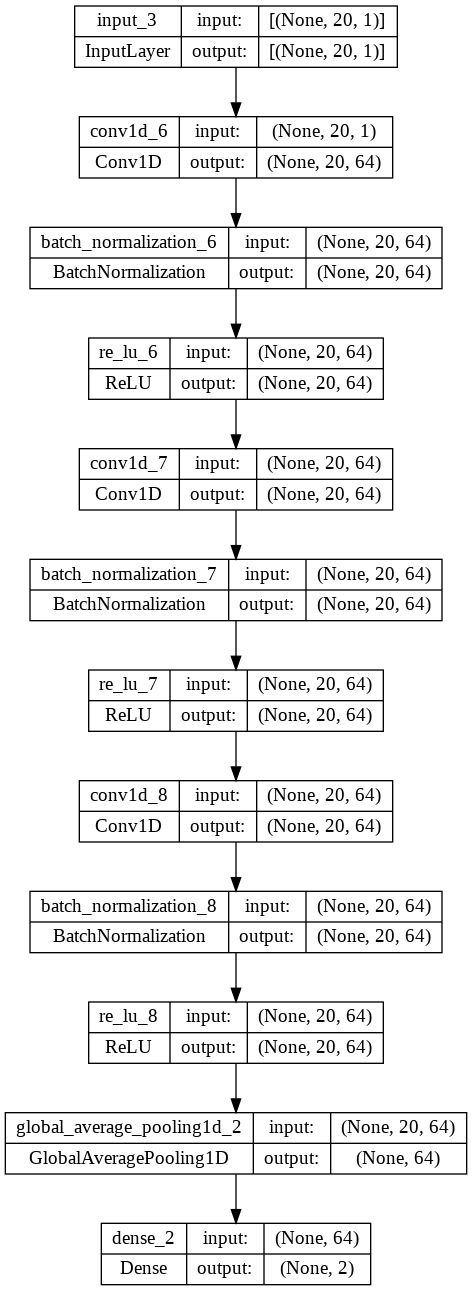

In [47]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

model = make_model(input_shape = X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
tf.random.set_seed(1004)

In [48]:
epochs = 500
batch_size = 32
tf.random.set_seed(1004)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
17/17 [==============================] - 2s 29ms/step - loss: 0.2567 - accuracy: 0.5019 - val_loss: 0.2500 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 14ms/step - loss: 0.2507 - accuracy: 0.4923 - val_loss: 0.2507 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 13ms/step - loss: 0.2502 - accuracy: 0.5000 - val_loss: 0.2508 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 11ms/step - loss: 0.2502 - accuracy: 0.5154 - val_loss: 0.2506 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 12ms/step - loss: 0.2501 - accuracy: 0.5385 - val_loss: 0.2507 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 12ms/step - loss: 0.2501 - accuracy: 0.4808 - val_loss: 0.2506 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 13ms/step - lo

KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

# 

# 종가 + 모회사

In [30]:
X_train = train[['종가','Posco']]
y_train = train[['label']]

X_test = test[['종가','Posco']]
y_test = test[['label']]

In [31]:
X_train, y_train = make_dataset(X_train, y_train, 20)

X_test, y_test = make_dataset(X_test, y_test, 20)
X_test.shape, y_test.shape

((40, 20, 2), (40, 1))

In [32]:
X_train.shape

(650, 20, 2)

In [33]:
num_classes = len(np.unique(y_train))

In [34]:
tf.random.set_seed(1004)

In [35]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

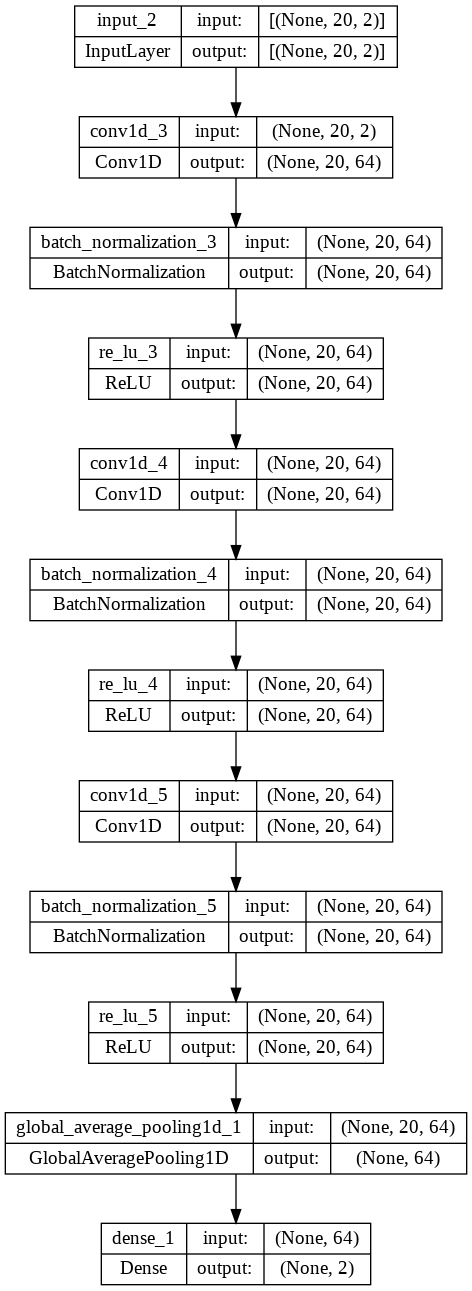

In [36]:
model = make_model(input_shape = X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [37]:
epochs = 500
batch_size = 32
tf.random.set_seed(1004)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
17/17 [==============================] - 2s 36ms/step - loss: 0.2582 - accuracy: 0.4692 - val_loss: 0.2501 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 14ms/step - loss: 0.2508 - accuracy: 0.5038 - val_loss: 0.2502 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 14ms/step - loss: 0.2502 - accuracy: 0.4846 - val_loss: 0.2504 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 18ms/step - loss: 0.2501 - accuracy: 0.4673 - val_loss: 0.2504 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 14ms/step - loss: 0.2501 - accuracy: 0.5096 - val_loss: 0.2504 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 16ms/step - loss: 0.2501 - accuracy: 0.5019 - val_loss: 0.2505 - val_accuracy: 0.5769 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 14ms/step - lo

In [38]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.4250
Test accuracy 0.42500001192092896
Test loss 0.2500033378601074


# 

# 종가 + 자회사

In [49]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [59]:
X_train = train[['종가','Posco_ch']]
y_train = train[['label']]

X_test = test[['종가','Posco_ch']]
y_test = test[['label']]

In [60]:
X_train, y_train = make_dataset(X_train, y_train, 5)

X_test, y_test = make_dataset(X_test, y_test, 5)
X_test.shape, y_test.shape

((55, 5, 2), (55, 1))

In [61]:
X_train.shape

(665, 5, 2)

In [62]:
num_classes = len(np.unique(y_train))

In [63]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

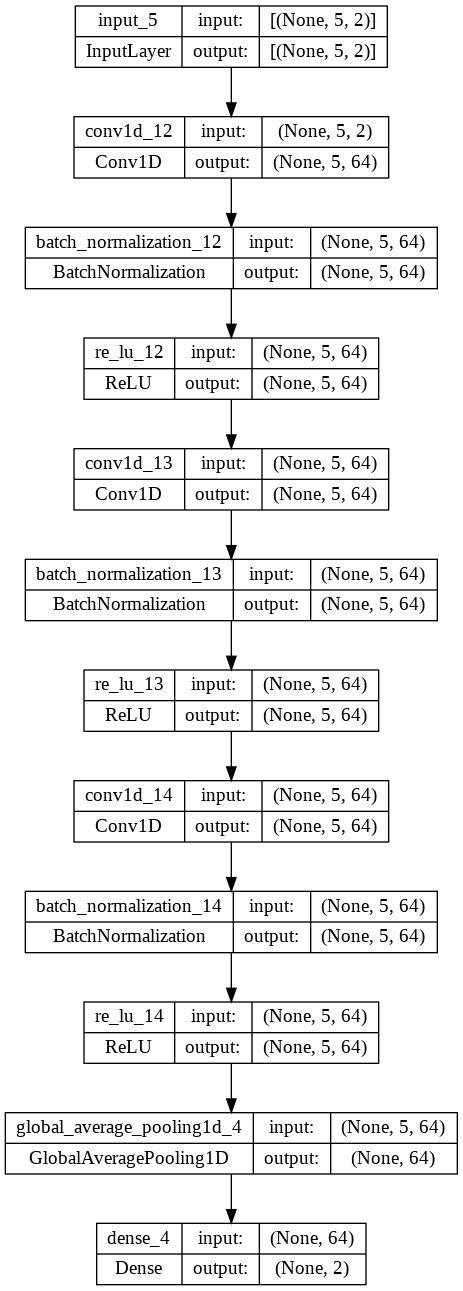

In [64]:
model = make_model(input_shape = X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [65]:
tf.random.set_seed(1004)

In [66]:
epochs = 500
batch_size = 32
tf.random.set_seed(1004)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss",
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)
]
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
17/17 [==============================] - 2s 23ms/step - loss: 0.2554 - accuracy: 0.5132 - val_loss: 0.2502 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2515 - accuracy: 0.5432 - val_loss: 0.2503 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 8ms/step - loss: 0.2509 - accuracy: 0.4756 - val_loss: 0.2503 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 9ms/step - loss: 0.2504 - accuracy: 0.5432 - val_loss: 0.2501 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 10ms/step - loss: 0.2502 - accuracy: 0.4887 - val_loss: 0.2501 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 9ms/step - loss: 0.2501 - accuracy: 0.5094 - val_loss: 0.2500 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 9ms/step - loss: 0

In [67]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.5091
Test accuracy 0.5090909004211426
Test loss 0.2500118315219879


# 종가 + 모회사+ 자회사

In [32]:
X_train = train[['종가','Posco','Posco_ch']]
y_train = train[['label']]

X_test = test[['종가','Posco','Posco_ch']]
y_test = test[['label']]

In [33]:
X_train, y_train = make_dataset(X_train, y_train, 5)

X_test, y_test = make_dataset(X_test, y_test, 5)
X_test.shape, y_test.shape

((55, 5, 3), (55, 1))

In [34]:
X_train.shape

(665, 5, 3)

In [35]:
num_classes = len(np.unique(y_train))

In [36]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

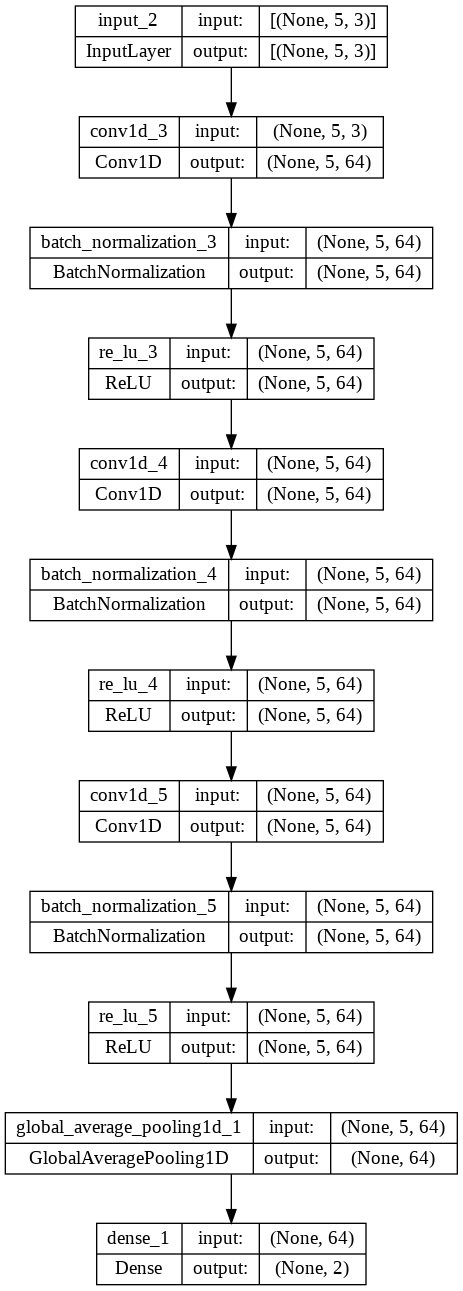

In [37]:
model = make_model(input_shape = X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [38]:
tf.random.set_seed(1004)

In [39]:
epochs = 500
batch_size = 32
tf.random.set_seed(1004)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
17/17 [==============================] - 2s 23ms/step - loss: 0.2575 - accuracy: 0.5169 - val_loss: 0.2501 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 8ms/step - loss: 0.2510 - accuracy: 0.4774 - val_loss: 0.2506 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2503 - accuracy: 0.5282 - val_loss: 0.2515 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2501 - accuracy: 0.4850 - val_loss: 0.2518 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 7ms/step - loss: 0.2501 - accuracy: 0.5019 - val_loss: 0.2521 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.5094 - val_loss: 0.2522 - val_accuracy: 0.4211 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 7ms/step - loss: 0.

In [40]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.5636
Test accuracy 0.5636363625526428
Test loss 0.2500060200691223
